✅ Convolutional Neural Network (CNN)

A Convolutional Neural Network is a deep learning model specially designed for image recognition tasks. Instead of taking the whole image as a flat vector, it learns image patterns like edges, curves, and textures directly from pixels. CNNs work better than normal neural networks for images because they capture spatial relationships.

✅ Convolution Layer (Conv2D)

The convolution layer applies filters (small matrices) that slide over the image to detect features such as edges, corners, and shapes. Each filter creates a new feature map that highlights a specific pattern in the image. This helps the network learn visual features step-by-step, from simple to complex.

✅ Filters / Kernels

Filters are small grids like 3×3 or 5×5 that move over the image and extract meaningful features. Each filter detects a specific pattern (like vertical lines or curves). More filters = more features learned.

✅ ReLU Activation

ReLU replaces negative values with zero while keeping positive values the same. This introduces non-linearity and helps the model train faster, making it ideal for CNN hidden layers.

✅ Pooling Layer (MaxPooling)

Pooling layers reduce the size of feature maps by selecting the most important values (like taking the maximum in a region). This decreases computation, prevents overfitting, and keeps only the strongest features.

✅ Flatten Layer

Flatten converts the 2D feature maps from the CNN into a 1D vector so they can be passed into fully connected layers. It forms the bridge between convolution layers and dense layers.

✅ Dense Layer / Fully Connected Layer

The dense layer learns final decision patterns by combining the features extracted by convolution layers. It outputs class probabilities — here, which digit (0–9) the image represents.

✅ Softmax Layer

Softmax converts the final outputs into a probability distribution over 10 digit classes. The digit with the highest probability becomes the model’s prediction.

✅ Adam Optimizer

Adam is an advanced optimization algorithm that adapts the learning rate automatically during training. It trains faster and more efficiently than basic SGD, especially for deep networks like CNNs.

✅ Cross-Entropy Loss

Cross-entropy measures how far the predicted probabilities are from the actual labels. Lower loss means the model is learning correctly. Categorical cross-entropy is used for multi-class classification like MNIST digits.

✅ Epochs & Batch Size

Epochs tell how many times the full dataset passes through the network during training. Batch size defines how many images are processed before updating weights. Together, they control learning speed and performance.

✅ Feature Extraction

CNNs learn to automatically extract useful visual patterns from images, starting from simple edges to complex shapes. This automatic feature learning makes CNNs powerful for computer vision.

✅ Model Evaluation

After training, the model is tested on unseen images to check how well it generalizes. Accuracy and loss graphs help analyze learning behavior and detect issues like overfitting.

When we add more layers to a neural network, the model becomes deeper and can learn more complex patterns and features from data, improving its ability to recognize subtle relationships. However, too many layers can lead to problems like overfitting (memorizing training data), vanishing gradients (training slows or stops), and longer training times

learn more complex patterns and features from the data.

Image → Conv → Pool → Conv → Pool → Flatten → Dense → Output


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load CSV data
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

# First column = labels, next 784 columns = pixels
y_train = train_df.iloc[:,0].values
x_train = train_df.iloc[:,1:].values

y_test = test_df.iloc[:,0].values
x_test = test_df.iloc[:,1:].values

# Scale pixels (0–255 → 0–1) # faster training(normalize pixel values && train faster and more accurately)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape gives images their 2D spatial structure (Reshape to image format)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# Convert labels to one-hot vectors (0–9)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# We use categorical crossentropy because the labels are one-hot encoded
#optimizers used to update a neural network’s weights to minimize the loss function during training

# Optimizer	Controls how weights get updated (e.g., Adam)
# Loss function	Tells model what to minimize, measures error (e.g., categorical_crossentropy)
# Metrics	What to monitor during training (e.g., accuracy)

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=4, batch_size=64,validation_split=0.2)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.9569 - loss: 0.1406 - val_accuracy: 0.9826 - val_loss: 0.0634
Epoch 2/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.9837 - loss: 0.0544 - val_accuracy: 0.9864 - val_loss: 0.0479
Epoch 3/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9907 - loss: 0.0304 - val_accuracy: 0.9873 - val_loss: 0.0427
Epoch 4/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9926 - loss: 0.0229 - val_accuracy: 0.9868 - val_loss: 0.0465


In [ ]:
# --- e. Evaluate the network ---
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f'test_accuracy:{test_accuracy*100:.4f}%')
print(f'test_loss:{test_loss:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9841 - loss: 0.0492
Test Accuracy: 98.73999953269958


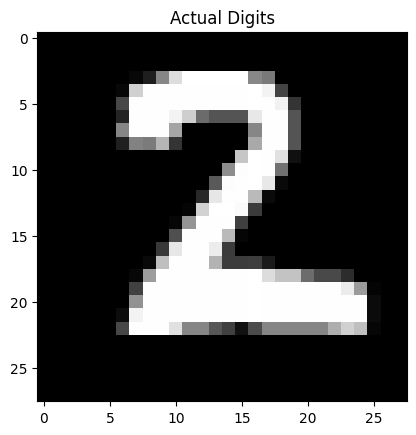

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Predicted Digit = 2


In [ ]:
import random
import matplotlib.pyplot as plt
n=random.randint(0,9999)
plt.imshow(x_test[n].reshape(28,28),cmap='gray')
plt.title("Actual Digits")
plt.show()

pred=model.predict(x_test)
print("Predicted Digit =", np.argmax(pred[n]))

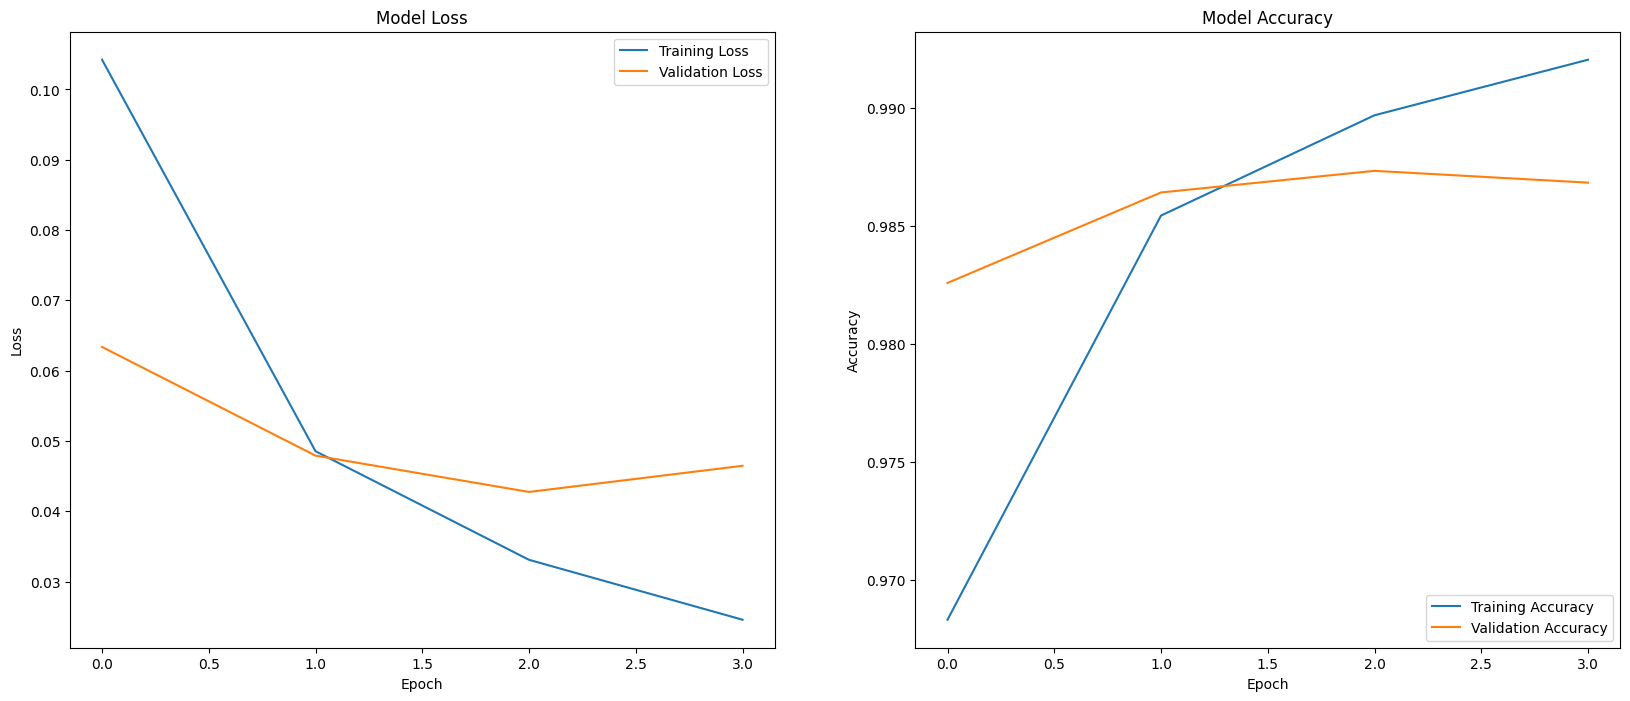

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load CSV data
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

# First column = labels, next 784 columns = pixels
y_train = train_df['label'].values
x_train = train_df.iloc[:,:-1].values

y_test = test_df['label'].values
x_test = test_df.iloc[:,:-1].values

# Scale pixels (0–255 → 0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN (batch, height, width, channels)
x_train = x_train.reshape(-1,32,32,3)
x_test = x_test.reshape(-1,32,32,3)

# Convert labels to one-hot vectors (0–9)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
print(train_df)

       pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0           59       62       63       43       46       45       50       48   
1          154      177      187      126      137      136      105      104   
2          255      255      255      253      253      253      253      253   
3           28       25       10       37       34       19       38       35   
4          170      180      198      168      178      196      177      185   
...        ...      ...      ...      ...      ...      ...      ...      ...   
49995      145      161      194      151      166      199      156      171   
49996      255      245      132      254      247      134      255      249   
49997       35      178      235       40      176      239       42      176   
49998      189      211      240      186      208      236      185      207   
49999      229      229      239      236      237      247      234      236   

       pixel_8  pixel_9  ..

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=4, batch_size=128,validation_split=0.2)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 162ms/step - accuracy: 0.3337 - loss: 1.8302 - val_accuracy: 0.4857 - val_loss: 1.4466
Epoch 2/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 48s 154ms/step - accuracy: 0.5369 - loss: 1.2991 - val_accuracy: 0.5884 - val_loss: 1.1938
Epoch 3/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 161ms/step - accuracy: 0.6009 - loss: 1.1488 - val_accuracy: 0.6136 - val_loss: 1.1092
Epoch 4/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 164ms/step - accuracy: 0.6368 - loss: 1.0352 - val_accuracy: 0.6337 - val_loss: 1.0618


In [ ]:
# --- d. Estimating the model's performance ---

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Loss: 1.0423
Test Accuracy: 64.01%


ACCURACY EVEN USING CNN DOESNT TOUCH 80 OR 90% BECAUSE:


1.   IMAGES ARE IN A 32x32 PIXEL RESOLUTION, IT IS HARD EVEN FOR HUMANS TO CLASSIFY SOME IMAGES IN THIS RESOLUTION.
2.   CNN IMPLEMENTED HERE IS RELATIVELY SIMPLE.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Predicted digit = 6
frog


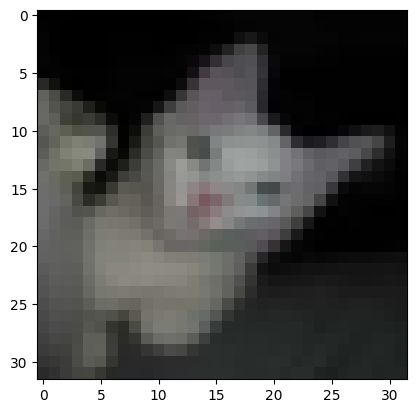

In [ ]:
import random
n=random.randint(0,9999)
plt.imshow(x_test[n].reshape(32,32,3))
cifar10_labels = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]
pred=model.predict(x_test)
print("Predicted digit =", np.argmax(pred[n]))
print(cifar10_labels[np.argmax(pred[n])])

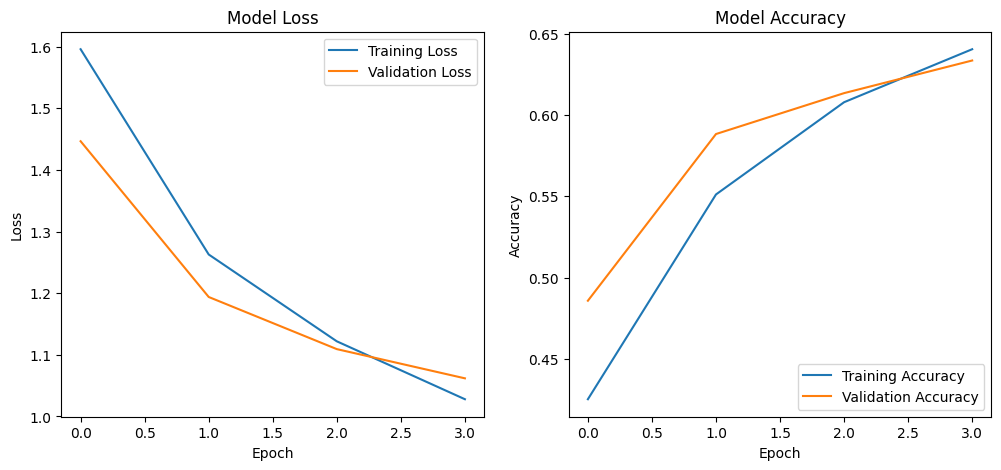

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

plt.show()